In this section, we consider a dynamical variable $\mathbf{x}(t)$, which is a function of a single parameter $t$. The parameter $t$ can be any single parameter.  In physics, however, it usually represents time. Hence, we shall call $t$ _time_ in this section. The variable $\mathbf{x}$ can be scalar, vector, or a collection of any real valued quantities. (For complex quantities, real and imaginary parts can be treated as two independent variables.)  The position and momentum of a particle are such dynamical variables.  

The dynamical variable usually satisfies a certain ordinary differential equation (ODE).  We are interested in finding a particular evolution of the variable for $t_\text{fin} \ge t \ge t_\text{ini}$ by solving the ODE,  where $t_\text{ini}$ and $t_\text{fin}$  are initial and final time.  To solve it, we need a particular value of the variable at a given time.  Typically, we are given an _initial value_ $\mathbf{x}(t_\text{ini})$ and thus  this kind of mathematical problem is called _initial value problem_.

We begin with first-order ODEs expressed in a standard form:

$$
\dot{\mathbf{x}} = \mathbf{F}(\mathbf{x},t) 
$$

where $\mathbf{F}$ is a given function of $\mathbf{x}$ and $t$.  Second order ODEs are discussed in the next section. 

## First Order ODEs

For simplicity, we focus on the first order ODE of a single scalar variable $x$ for a while. Multivariable cases will be discussed in the later subsections. More specifically, we want to solve the following type of ODE:

$$
\dot{x} = F(x,t)
$$(eq:ode-1d)

for a given function $F(x,t)$ and an initial condition $x(t_0)$ .  The exact solution is a continuous function $x(t)$ for a time period from an initial time $t_\text{ini}$ to a final time $t_\text{fin}$.  However, in the computer we work with discrete time $t_n = t_\text{ini} + n h,\, n=0, \cdots, N$ where $h$ is a time step defined by $h=\displaystyle\frac{t_\text{fin}-t_\text{ini}}{N}$.   The numerical solution is expressed as a sequence $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$. (Notice that $t_0=t_\text{ini}$)  For convenience, we introduce shorthand expression $x_{n} \equiv x(t_n)$ and also $F_n = F(x_n,t_n)$.  Our goal is to develop numerical algorithms to predict $x_{n+1})$  knowing the previous points $\{x_0,\cdots,x_n\}$. We can construct the whole sequence by repeating the procedure recursively starting from $x_0$.   

While there are a variety of approaches to solve the ODE {eq}`eq:ode-1d`,  we adopt a most popular approach based on Taylor expansion:

$$
\begin{eqnarray}
x(t_{n+1}) &=& x(t_n) + \dot{x}(t_n) h + \ddot{x}(t_n) \frac{h^2}{2} + \cdots \\
&=& x(t_n) + h F(x_n,t_n) + \frac{h^2}{2} \left [F \frac{\partial F}{\partial x} + \frac{\partial F}{\partial t}\right](x_n,t_n) + \mathcal{O}(h^3)
\end{eqnarray}
$$(eq:ode-taylor1a)


Other approaches usually reach the identical or similar algorithms.  We shall discuss the graphcal interpretation for individual algorithms. 

We rewrite the ODE in a different mathematical form suitable for the development of numerical methods.  The basic idea is to construct a recursive equation.  There are two common approaches, one based on the [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem) and the other on integral equation. 
The mean value theorem states that there exist $c$ in $(a,b)$ such that $f'(c) = \displaystyle\frac{f(b)-f(a)}{b-a}$ where $f'(x) = \frac{d f}{d x}$.  Applying it to our problem, there exists $s \in (t_n,t_{n+1})$ such that 

$$
\frac{x(t_{n+1}) - x(t_{n})}{h} = \dot{x}(s) = F\left[x(s),s\right],\quad t_n < s < t_{n+1}.
$$(eq:ode-taylor1b)

from which we write the future point $x_{n+1}$ as

$$
x_{n+1} = x_n + h F\left[x(s),s\right]
$$(eq:ode-mean-value)

This equation is still not computable since we don't know the value of $s$ and $x(s)$ in the right hand side.  We need to invent an approximation to estimate $F(x(s),s)$. The second approach is to rewrite the ODE in a form of integral.  Integrating the both sides of the ODE, we obtain

$$
x_{n+1} = x_n + \int_{t_n}^{t_{n+1}} F[x(s),s]\, ds\, .
$$(eq:ode-integral)

which is another exact relation.  To carry out the integral we need to know $x(s)$ but it is the solution of the ODE we are tying to find. Therefore, we need a method to approximately estimate the integral without the knowledge of $x(s)$.

The two expressions, {eq}`eq:ode-mean-value` and {eq}`eq:ode-integral`, are mathematically equivalent since there is $s \in (t_n,t_{n+1})$  such that $\int_{a}^{b} f(x) dx = (b-a) f(s)$.  At the end the both approaches reach the same outcome. However, the two approaches provide different visual interpretations. Looking at the same problem from two different views may help us to develop a better approximation for a higher accuracy. In either approach, we construct a recursive equation and we obtain the solution $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$ one by one recursively.  To do so, we must find a good estimate of $F\left[x(t),t\right]$ for the interval $(t_n,t_{n+1})$.   


### Euler method

We being with the simplest method which may not be useful in practical applications but gives us some idea of how numerical integration of an ODE works. Consider the Tayler expansion {eq}`eq:ode-taylor1a`.  If $h$ is small enough, we can ingnore the terms of order $h^2^ and higher, then we have

$$
x(t_n+h) = x(t_n) + \dot{x}(t_n) h + \mathcal{O}(h^2)
$$(eq:euler-rule)

Using the ODE, we replace $\dot{x}(t_n)$ with $F(x(t_n),t_n)$ which leads to a recursive equation

$$
x_{n+1} = x_n + F_n\, h
$$

where $\mathcal{O}(h^2)$ ignored.  The recursive equation is known as the Euler rule .  The visual interpretation of the Euler method is quite simple.  First we assumes that the curve $x(t)$ is approximately a straight line between $t_n$ and $t_{n+1}$.  The slope of the curve is unknown except at $t_n$.  So, we just use $\dot{x}(t_n) = F_n$ as the slope. (See the right panel of {numref}`fig:euler-ode`.)
We further justify the Euler method using the forward finite difference approximation of derivative ({numref}`sec:finite-diff`). Substituting the forward finite difference method, $\dot{x}(t_n) = (x_(t_n+h)-x(t_n))/h$ to the ODE, we obtain {eq}`eq:euler-rule`.  Hence the Euler method is equivalent to use the forward finite difference method to evaluate the derivative in the ODE. 
From the prospect of Eq. {eq}`eq:ode-mean-value`, the unknown $s$ is replaced with $t_n$, which is exactly the forward finite difference method. 
In {eq}`eq:ode-integral`, the integral is approximated by the rectangular rule ({numref}`sec:piecewise-integral`) as illustrated in the left panel of {numref}`fig:euler-ode`.

To get the whole sequence $\{x_n\}$ starting from the initial value, $x_0$, we first evaluate $F_0=F(x_0,t_0)$.  Then, $x_1$ is predicted by Eq. {eq}`eq:euler-rule`.
Using this procedure recursively, we obtain the whole sequence from $x_0$ to $x_N$.  This method is known as the Euler method.

Earlier, we learned that neither the forward finite different method nor the rectangular rule is accurate enough in practical applications. Therefore, we don't expect that the Euler method is a good method. From the Tayler exapansion, the order of error is $h^2$ for each step.
After $N$ iteration, the global error becomes $N \mathcal{O}(h^2) \sim \mathcal{O}(h)$.  We hope that this is a good approximation with a sufficiently small $h$. However, the order $h$ of error is not acceptable and thus the Euler method is not good enough in practice. 


```{figure} euler-ode.webp
:name: fig:euler-ode
Illustration of the Euler method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral` which is unknown to us. Assuming that $F_n$ is on the exact curve, we approximate the integral (the shaded area) by the rectangular rule (the area of the blue rectangle) discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the slope of the curve at $t_n$,  we extrapolate next point $x_{n+1}$ assuming the curve is close to the straight line (red line). This is equivalent to use the forward finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.  Note that even if $x_n$ is on the exact curve, $x_{n+1}$ is not.  The error is clearly visible.
```

```{admonition} Algorithm 6.1.1:  Euler method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Evaluate the function $F_n=F(x_n,t_n)$.
   2. Calculate a new point $x_{n+1}=x_n+F_n h$.
   3. Increment the step: $n=n+1$.
```

### Predictor-Corrector Method

One way to raise the accuracy of the Euler method is to use a more accurate slope.  Consider another Taylor expansion around $t_{n+1}$ with the negative step $-h$:

$$
x(t_n) = x(t_n+h) - \dot{x}(t_n+h) h + \ddot{x}(t_n+h) \frac{(-h)^2}{2} + \cdots.
$$(eq:ode-taylor2)

Subtract Eq. {eq}`eq:ode-taylor2` from Eq. {eq}`eq:ode-taylor1a` and rearrange the result, we find

$$
x_{n+1} = x_n + \frac{h}{2}[\dot{x}(t_n)+\dot{x}(t_{n+1})] + \frac{h^2}{4}[\ddot{x}(t_n) - \ddot{x}(t_{n+1})] + \cdots =  x_n + \frac{h}{2}[\dot{x}(t_n)+\dot{x}(t_{n+1})] + \mathcal{O}(h^3)
$$

where we used $\ddot{x}(t_n) - \ddot{x}(t_{n+1}) \sim \mathcal{O}(h)$.  Replacing $\dot{x}$ with $F(x,t)$, we obtain a relation similar to the Euler rule {eq}`eq:euler-rule`:

$$
x_{n+1} = x_n + \frac{ F_n + F_{n+1} }{2} h.
$$(eq:ode-implicit)

Comparing this equation with the Euler rule {eq}`eq:euler-rule`, the slope  $F_n$ is replaced with the average of the current slope $F_n$ and future slope $F_{n+1}$ (the right panel of {numref}`fig:predict-correct`.  The order of error is $h^3$, better than $h^2$ of the Euler method.

From the view of {eq}`eq:ode-mean-diff`, the right hand side is replaced by the average:

$$
F(x(s),s) \approx \frac{1}{2}( F_n + F_{n+1} ).
$$(eq:ode-mean-diff)

Similarly, we can improve the accuracy of the integral in {eq}`eq:ode-integral` by using  the trapezoidal rule instead of the rectangular rule (see the left panel of {numref}`fig:predict-correct`):

$$
\int_{t_n}^{t_{n+1}} F[x(t),t] dt \approx \frac{F_n + F_{n+1}}{2} h.
$$(eq:ode-trapezoidal)

In either approach, we obtain the same relation {eq}`eq:ode-implicit`.

Unlike the Euler rule {eq}`eq:euler-rule`, Eq. {eq}`eq:ode-implicit` is implicit since the both sides contain future point $x_{n+1}$.  Solving it for $x_{n+1}$ is not a trivial task.  A common approach is the following iterative method. First we guess the solution, which we denote as $x^{(0)}_{n+1}$. Using it in the right hand side of {eq}`eq:ode-implicit`, we obtain a new prediction $x^{(1)}_{n+1}$.  Then, plug it in the right hand side again, we get another prediction $x^{(2)}_{n+1}$.  By repeating this procedure, the difference between the input and the output becomes negligible after a certain number of iterations, that is $x^{(k+1)}_{n+1} \approx x^{(k)}_{n+1}$. We say that the input and the output is now self-consistent.  We can stop the iteration when a desired accuracy is achieved.  The iterative method is not stable and can go wrong after many iterations.  There are ways to stabilize the iteration which we will discuss in a later chapter.

To apply the iterative method to the our problem, we use the Euler rule to get the good first guess: $x^{(0)}_{n+1} = x_n + F_n h$.  The output of the first iteration is 

$$
x^{(1)}_{n+1} = x_n + \frac{F(x_n,t_n) + F(x^{(0)}_{n+1},t_{n+1})}{2}h
$$

If the output is not accurate enough, we go to the next round.  Since {eq}`eq:ode-implicit` is valid only at the order of $h^3$, we don't have to iterate the procedure many times.  Anything better than the Euler rule is good enough.  Hence, no further iteration is necessary in the current approximation.  Now, we have a future point $x^{(1)}_{n+1}$, which is better than the Euler rule. 

In summary, we *predict* $x_{n+1}$ using the Euler method. Let the first slope $k_1 = F(x_n,t_n)$.  Then, $x^{(0)}_{n+1} = x_n + k_1 h$.  At the second step, we evaluate the second slope $k_2 = F(x^{(0)}_{n+1},t_{n+1}) = F(x_n + k_1 h, t_n)$ .  Then *correct* $x^{(0)}_{n+1}$ using the second slope by Eq. {eq}`eq:ode-implicit`.  The new $x_{n+1}$ is given by

$$
x^{(1)}_{n+1} \approx x_n + \frac{h}{2} (k_1 + k_2).
$$(eq:ode-predictor-corrector)

This is the "predictor-corrector" method.    The order of error at each step is determined by the trapezoidal rule, that is $\mathcal{O}(h^3)$.   Thus the overall error is $N \mathcal{O}(h^3) \sim \mathcal{O}(h^2)$.

```{figure} predict-correct.webp
:name: fig:predict-correct
Illustration of the predictor-corrector method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral`, which is unknown to us. Assuming that we know both $F(x(t_n),t_n)$ and $F(x(t_{n+1}),t_{n+1})$, we approximate the integral by the trapezoidal rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the two slopes (two green lines) $\dot{x}_n = F(x(t_n),t_n)$ and $\dot{x}_{n+1} = F(x(t_{n+1}),t_{n+1})$,  we approximate $\dot{x}(t)$ with the average of the two slopes.  This is equivalent to use the mean finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.
```

```{admonition} Algorithm 6.1.2:  Predictor-corrector method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. first slope: $k_1 = F(x_n,t_n)$
   2. predictor: $x_{n+1} = x_n + k_1 h$.
   2. second slope: $k_2 = F(x_{n+1},t_{n+1})$.
   3. corrector: $x_{n+1}=x_n + \displaystyle\frac{h}{2} \left ( k_1 + k_2 \right )$.
   4. Increment the step: $n=n+1$.
```

**Example** {numref}`%s.1 <sec:ode-initial-value-problems>`

A particle of mass $m$ is dropped from rest under a uniform gravity $g$.  The drag force due to the presence of air is $-\gamma v$ where $v$ is velocity and $\gamma$ the frictional coefficient. The equation of motion is given by the Newton equation:

$$
m \dot{v} = - \gamma v - m g
$$(eq:eom-free-falling)

and its solution with the initial condition $v(0)=0$ is given by

$$
v(t) = \frac{m g}{\gamma} \left ( e^{-\gamma t} -1 \right )\,.
$$

where $-m g /\gamma$ is the terminal velocity.

Let us integrate the Newton equations using Euler and Predictor-Corrector methods and compare the results with the exact solution.  We integrate from $t=0$ to $t=10$ using the step size $h=0.01$.  As usual, we simplify the mathematical expression by normalizing quantities and reduce the number of parameters.  By normalizing the time as $\tau =\gamma t/m$ and introducing a new constant $\xi = m  g \gamma$, Eq. {eq}`eq:eom-free-falling` becomes $\dot{v} = -v + \xi$ where $\dot{v} = \frac{dv}{d\tau}$.   Now, we have only one parameter $\xi$ and the terminal velocity is given by $-\xi$.



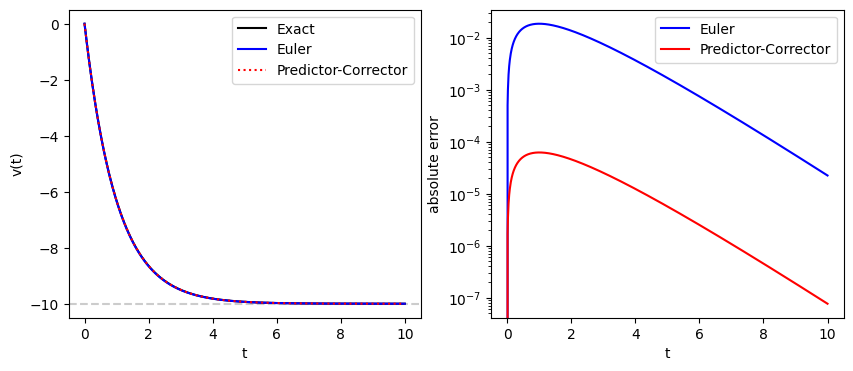

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
g=10.0

# integration parameters
tmax=10.  # maximum time
N=1000   # maximum steps
h=tmax/N # time step

# set arrays
v_ex=np.zeros(N+1)
v_eu=np.zeros(N+1)
v_pc=np.zeros(N+1)
t=np.linspace(0,N,N+1)*h

# intial condition
v_ex[0]=0.0
v_eu[0]=0.0
v_pc[0]=0.0

for i in range(0,N):
    # Euler method
    F = -v_eu[i] - g 
    v_eu[i+1] = v_eu[i] + F*h
    
    # Predictor-Corrector method
    F= -v_pc[i] - g
    v_pc[i+1] = v_pc[i] + F*h;  # predictor
    F = -(v_pc[i]+v_pc[i+1])/2 - g
    v_pc[i+1] = v_pc[i] + F*h   # corrector
    
    # Exact solution
    v_ex[i+1] = g*(np.exp(-t[i+1])-1)

plt.ioff()
plt.figure(figsize=(10,4))

# Plot the solutions
plt.subplot(1,2,1);
plt.axhline(y = -g, color = '0.8', linestyle = '--')
plt.plot(t,v_ex,'-k',label='Exact')
plt.plot(t,v_eu,'-b',label='Euler')
plt.plot(t,v_pc,':r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc=1)

# Plot the absolute errors
plt.subplot(1,2,2)
plt.semilogy(t,abs(v_eu-v_ex),'-b',label='Euler')
plt.semilogy(t,abs(v_pc-v_ex),'-r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend(loc=1)
plt.show()

The left plots show that the trajectories of the two numerical methods agree with the exact trajectory at least in he naked eyes.  The right panel plots the absolute errors.  The predictor-corrector method is significantly better than the Euler method.

### 2nd-order Runge-Kutta Method

The Runge-Kutta (RK) developed a systematic way to improve the accuracy of the numerical integration of ODEs based on the Taylor expansion.  FOr the second order RUnge-Kutta method,  we write a recursive equation in the following form:

$$
x_{n+1} = x_{n} + a k_1 + b k_2
$$(eq:k1+k2_RK2)

where 

$$
k_1 = h F(x_n,t_n)
$$

$$
k_2 = h F(x_n + \beta k_1,t_n + \alpha h)
$$(eq:k2_RG2)

We want to make the approximation accurate up to the order of $h^2$.  That is we neglect the order of $h^3$ and higher.  It is clear that $k_1$ is exactly at the order of $h$ and thus no approximation is needed. On the other hand, $k_2$ has higher order terms since $F$ in the right hand side of EQ. {eq}`eq:k2_RG2` contains $h$.  Expanding in Taylor series, EQ. {eq}`eq:k2_RG2` can be expressed as

$$
\begin{eqnarray}
k_2 &=& h F(x_n,t_n) + h \beta k_1 \frac{\partial F}{\partial x}(x_n,t_n) + \alpha h^2 \frac{\partial F}{\partial t}(x_n,t_n) + \mathcal{O}(h^3) \\
&=& h F(x_n,t_n) + h^2  \left[\beta F(x_n,t_n) \frac{\partial F}{\partial x}(x_n,t_n)+ \alpha \frac{\partial F}{\partial t}(x_n,t_n) \right] + \mathcal{O}(h^3) 
\end{eqnarray}
$$

Plug $k_1$ and $ k_2$ in to EQ`eq:k1+k2_RK2`, we find the recursive equation

$$
x_{n+1} = x_{n} + h (a+b) F(x_n,t_n) + h^2 b \left(\alpha \frac{\partial F}{\partial t} + \beta 
F \frac{\partial F}{\partial x} \right) (x_n,t)
$$

Now, compare this with the direct calculation of Taylor expansion {eq}`eq:ode-taylor1a`,  we find that $\alpha$ and $\beta$ must satisfy the following equation:

$$
a+b=1, \quad \alpha b =\frac{1}{2}, \quad \beta b=\frac{1}{2}
$$

Since there are only three equations for four unknowns, the solution is not unique  and there are infinitely many solutions..  We can find immediately $a=b=\frac{1}{2}, \alpha=\beta=1$ satisfies the equation.  This nothing but the predictor-corrector method. Anther simple solution is $a=0, b=1, \alpha=\beta=\frac{1}{2}$, which is known as midpoint method.  A slightly odd solution known as Ralston’s Method is given by $a=\frac{1}{3}, b=\frac{2}{3}, \alpha=\beta=\frac{3}{4}$. All these solutions give the same order of accuracy.






```{figure} rk2.webp
:name: fig:rk2
Illustration of the predictor-corrector method.  *Left*: The blue line represents the integrand of Eq. {eq}`eq:ode-integral`, which is unknown to us. Assuming that we know both $F(x(t_n),t_n)$ and $F(x(t_{n+1}),t_{n+1})$, we approximate the integral by the trapezoidal rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the two slopes (two green lines) $\dot{x}_n = F(x(t_n),t_n)$ and $\dot{x}_{n+1} = F(x(t_{n+1}),t_{n+1})$,  we approximate $\dot{x}(t)$ with the average of the two slopes.  This is equivalent to use the mean finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.
```

```{admonition} Algorithm 6.1.2:  2nd-order Runge-Kutta method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Predictor: $k_1 = F(x_n,t_n)$
   2. Corrector: $k_2 = F(x_n+k_1 h/2,t_{n}+h/2)$.
   3. New point: $x_{n+1}=x_n + k_2 h$.
   4. Increment the step: $n=n+1$.
```

### 4th-Order Runge-Kutta Method

The Runge-Kutta approach allows us to systematically improve the accuracy.  The second RK method evaluate $F(x,t)$, twice per step.  Now consider a RK method that evaluate it four times per step, which is known as the 4th order RK method. The method is highly accurate and widely used in real applications. Since the rigorous derivation of this formula is a bit complicated, we introduce it based on a heuristic consideration.

In order to further improve the accuracy, we use a better numerical integration method, the Simpson rule:

$$
\int_{x_n}^{x_{n}+h} F(x(t),t) dt = \frac{h}{6} \left ( F_n + 4 F_{n+1/2} + F_{n+1} \right ) + \mathcal{O}(h^5) .
$$(eq:rk4-simpson)

We learned that the Simpson rule is highly accurate.  However, in order to take the advantage, we must carefully evaluate $F_{n+1/2}$ and $F_{n+1}$ to keep the high level of accuracy.  Recalling that the high accuracy of the Simpson rule is due to the symmetric treatment of intervals $[t_n,t_{n+1/2}]$ and $[t_{n+1/2},t_{n+1}]$ so that errors in the two interval cancel out. (See Sec. {numref}`sec:piecewise-integral`.)  The key point is how to evaluate the mid point $x_{n+1/2}$. As usual, we begin with the Euler method in which we predict $x_{n+1/2}$ using the slope $k_1 \equiv F(x_n,t_n)$. 

$$
F_{n+1/2}^{(0)}= F\left(x_n + \frac{h}{2} k_1,t_{n+1/2}\right)  \equiv k_2 .
$$(eq:rk4-k2)

If the curve $x(t)$ is concave (convex), the Euler method over-(under-)estimate $x_{n+1/2}$.  Now we try to correct the error using the slope at $t_N{n+1/2}$, that is $k_2$.

$$
F_{n+1/2}^{(1)} = F\left(x_n + \frac{h}{2} k_2,t_{n+1/2}\right)  \equiv k_3 .
$$(eq:rk4-k3)

Knowing that  $k_2<k_1$ for concave curve and $k_2 < k_1$ for convex curve,  the direction of error in $F_{n+1/2}^{(1)}$ is opposite to that in $F_{n+1/2}^{(0)}$.  The average of the two predictions cancels their errors.  Now, we have a much better approximation 

$$
F_{n+1/2} = \frac{1}{2}(F_{n+1/2}^{(0)}+F_{n+1/2}^{(1)}) = \frac{1}{2}(k_2+k_3) .
$$(eq:rk4-k23)

Using the midpoint formula we obtain 

$$
F_{n+1} = F\left[x_n+\frac{h}{2}(k_2+k_3), t_{n+1}\right]
$$(eq:rk4-endpoint1)

It turns out that 

$$
F_{n+1}= F(x_n+ h k_3, t_{n+1})  \equiv k_4 
$$(eq:rk4-endpoint2)

is good enough.  


Substituting {eq}`eq:rk4-k23` and {eq}`eq:rk4-endpoint2` to {eq}`eq:rk4-simpson` we obtain the 4th-order Runge-Kutta method

$$
x_{n+1} = x_n + \frac{h}{6}\left(k_1 + 2 k_2 + 2 k_3 + k_4\right).
$$


```{admonition} Algorithm 6.1.2:  2nd-order Runge-Kutta method

1. Set the total period $T$ and the number of steps $N$.
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0$.
4. Reset the counter: $n=0$.
5. Repeat the following $N$ times.
   1. Increment time: $t_{n+1}=t_0 + (n+1)h$.
   2. Slope at $t_n$: $k_1 = F(x_n,t_n)$			
   3. Slope at $t_{n+1/2}$ (1st try): $k_2 = F(x_n + \frac{k_1 h}{2}, t_n + \frac{h}{2}  )$.
   4. Slope at $t_{n+1/2}$ (2nd try): $k_3 = F(x_n + \frac{k_2 h}{2}, t_n + \frac{h}{2} )$.
   5. Slope at $t_{n+1}$: $k_4  =  F(x_n + k_3 h, t_n + h) $.
   6. 4th order Runge-Kutta step: $x_n +\displaystyle\frac{h}{6} ( k_1 + 2 k_2 + 2 k_3 + k_4 )$.
   7. Increment the step: $n=n+1$.
```

**Example** {numref}`%s.2 <sec:ode-initial-value-problems>`  In Example {numref}`%s.1 <sec:ode-initial-value-problems>`, we found that the predictor-corrector method is more accurate than the Euler method.  For cpmparison, we solve the same problem with 2nd and 4th order Runge-Kutta methods.

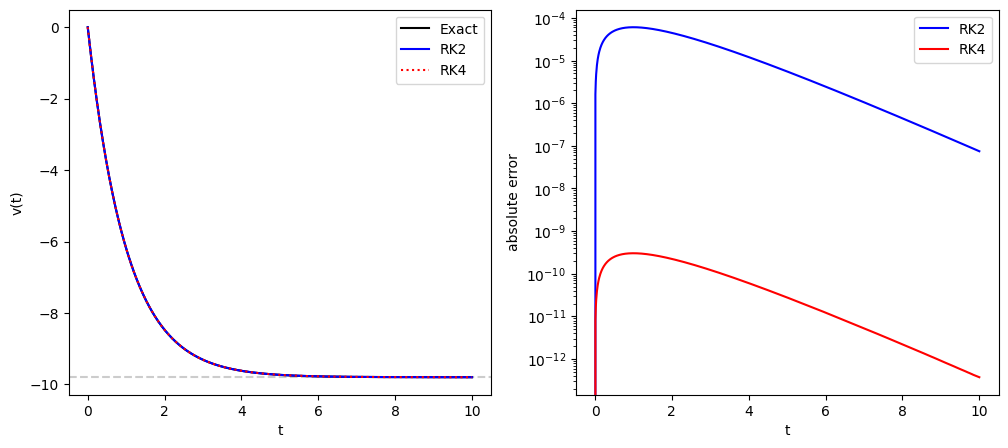

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# system parameters
gamma=1.0
g=9.8
m=1.0

# integration parameters
tmax=10  # maximum time
N=1000   # maximum steps
h=tmax/N # time step

# set arrays
v_rk2=np.zeros(N+1)
v_rk4=np.zeros(N+1)
v_ex=np.zeros(N+1)
t=np.linspace(0,N,N+1)*h

for i in range(0,N):
    
    # Runge-Kutta 2nd order
    k1 = -gamma*v_rk2[i]/m - g
    v_mid = v_rk2[i] + k1*h/2.0
    k2 = -gamma*v_mid/m - g
    v_rk2[i+1] = v_rk2[i] + k2*h
    
    # RUnge-Kutta 4th order
    k1 = -gamma*v_rk4[i]/m - g
    v_mid = v_rk4[i] + k1*h/2.0
    k2 = -gamma*v_mid/m - g
    v_mid = v_rk4[i] + k2*h/2
    k3 = -gamma*v_mid/m - g
    v_end = v_rk4[i] + k3*h    
    k4 = -gamma*v_end/m - g
    v_rk4[i+1] = v_rk4[i] + (k1+2*(k2+k3)+k4)*h/6.0
        
    # Exact solution
    v_ex[i+1] = m*g/gamma*(np.exp(-gamma*t[i+1])-1)
    
plt.ioff()
plt.figure(figsize=(12,5))

# Plot the solutions
plt.subplot(1,2,1);
plt.axhline(y = -g, color = '0.8', linestyle = '--')
plt.plot(t,v_ex,'-k',label='Exact')
plt.plot(t,v_rk2,'-b',label='RK2')
plt.plot(t,v_rk4,':r',label='RK4')


plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc=1)

# Plot the absolute errors
plt.subplot(1,2,2)
plt.semilogy(t,abs(v_rk2-v_ex),'-b',label='RK2')
plt.semilogy(t,abs(v_rk4-v_ex),'-r',label='RK4')

plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend(loc=1)
plt.show()

The outcomes of both the 2nd and 4th order RK methods agree with the exact solution as the left panel shows.  The right panel shows that while the error of the 2nd order RK method is comparable to that of the predictor corrector method.he absolute errors, the error of the 4th order RK method is far more accurate fi the same step size is used.

### Adaptive Step: Runge-Kutta-Fehlberg Method

The solution to an ODE can be slowly changing in some parts and rapidly varying in other parts.  If a constant step $h$ were used, it must be small enough for the rapid change.  However, such a small $h$ is not necessary in the slowly changing region and thus we waste computer time.  Furthermore, finding an appropriate step size becomes difficult if we don't know the rapidly changing part prior to the calculation.  It is desired to have an algorithm which automatically adjusts the step size as the solution is computed.  Runge-Kutta-Felberg method which is also known as RK45 finds appropriate step size so that the result is accurate to the given tolerance.

Like regular Runge-Kutta methods, we try to find solution $x_{n+1}$ at $t_{n+1}$ knowing the previous step $x_n$ at $t_n$ where $t_{n+1}= t_{n}+h$.  Here we show the algorithm without proof.  For a given $h$, we evaluate the following six quantities,

$$
\begin{eqnarray}
k_1 &=& h F(x_n,t_n) \\
k_2 &=& h F\left(x_n+\frac{1}{4}k_1,t_n+\frac{1}{4}h\right) \\
k_3 &=& h F\left(x_n+\frac{3}{32}k_1+\frac{9}{32}k_2,t_n+\frac{3}{8}h\right)\\
k_4 &=& h F\left(x_n+\frac{1932}{2197} k_1-\frac{7200}{2197}k_2+\frac{7296}{2197}k_3,t_n+\frac{12}{13}h\right)\\
k_5 &=& h F\left(x_n+\frac{439}{216} k_1 - 8 k_2 + \frac{3680}{513} k_3 - \frac{845}{4104} k_4,t_n+h \right)\\
k_6 &=& h F\left(x_n -\frac{8}{27} k_1 + 2 k_2 - \frac{3544}{2565} k_3 + \frac{1859}{4104} k_4 - \frac{11}{40} k_5, t_n + \frac{1}{2} h\right)
\end{eqnarray}
$$

Using four points ($k_1$, $k_3$, $k_4$, and $k_5$), we make a first prediction:

$$
x_{n+1} = x_{n} + \frac{25}{216} k_1 + \frac{1408}{2565} k_3 + \frac{2197}{4101} k_4 - \frac{1}{5} k_5
$$

The second prediction, which uses more points ($k_1$, $k_3$, $k_4$, $k_5$, and $k6$), i sgiven by

$$
x_{n+1}^\prime = x_{n} + \frac{16}{135} k_1 + \frac{6656}{12,825} k_3 + \frac{28,561}{56,430} k_4 - \frac{9}{
50} k_5 + \frac{2}{55} k_6.
$$

The second prediction  is more accurate than the first one.  Now, we estimate the error by

$$
\delta = \frac{1}{h} |x_{n+1}^\prime - x_{n+1}|.
$$

If $\delta < \text{tol}$ (where tol is a tolerance), then we accept $x_{n+1}^\prime$ as a good solution and moves to the next step.  
In this case, the current step size $h$ is clearly small enough. If $\delta \ll \text{tol}$,  perhaps, $h$ is too small. To save computing time, we may want to use a larger step size in the next step,  $h_\text{new} = \lambda h_\text{old}$ where

$$
\lambda =\left ( \frac{\text{tol}}{2 \delta} \right )^{1/4}.
$$\(eq:rk45_new_step)

When the error was much smaller than the tolerance, that is $\delta \ll \text{tol}$, $\lambda \gg 1$ and thus $h$ increases significantly.
On the other hand, if the error barely smaller than the tolerance, ($\delta \approx 1$), then $\lambda \approx 0.84$ and thus $h_\text{new}$ is lightly smaller than $h_\text{old}$ to improve the accuracy.

If $\delta > \text{tol}$, the prediction is not accurate enough and we need to recalculate the current step with a smaller $h$.  In this case, $\lambda < 0.84$, $h_\text{new} < h_\text{old}$ and thus the new prediction should be more accurate. WE repeat this procedure until the error becomes smaller than the tolerance.

In the following the factor $\lambda$ is plotted as a function of $\text{tol}/\delta$.  Even when the error is large, $h$ changes only gradually.

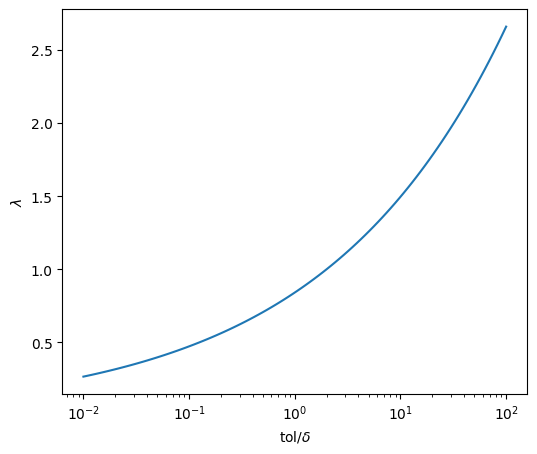

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,100)
r = 10**x
l = (0.5*r)**(1./4.)

plt.figure(figsize=(6,5))
plt.semilogx(r,l)
plt.xlabel(r"tol/$\delta$")
plt.ylabel(r"$\lambda$")
plt.show()

**Example** {numref}`%s.3 <sec:ode-initial-value-problems>`  In Example {numref}`%s.2 <sec:ode-initial-value-problems>`, we found the 4th order RK was remarkably accurate.  However, the accuracy was unnecessarily high.  We could use a larger step size.  Here , we solve the same free falling problem again using the RK45 method.  The aim of this example is how $h$ is adjusted to keep the accuracy smaller but also close to the tolerance.  For that purpose, we use a canned routine `RK45` in the `scipy` package.  It is easier to call RK45 through a wrapper function `solve_ivp`.

 the smallest h =  0.27858
 the largest h  =  1.39575


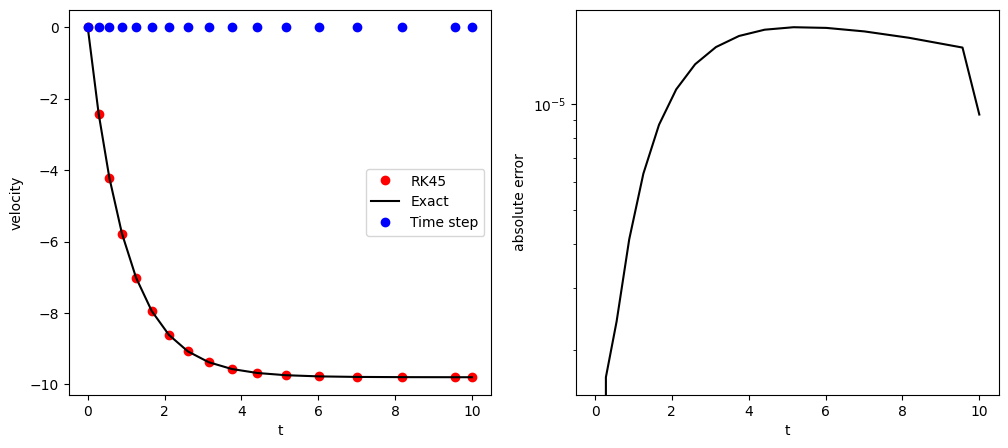

In [48]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def F(t,v):
# system parameters
    gamma=1.0
    m=1.0
    g=9.8
    a = -gamma*v/m - g
    return a

t0 = 0 # initial time
v0 = [0] # initial velocity
tspan = [0,10]  # maximum time
h0=1
rtol=1e-5

sol=solve_ivp(F,tspan,v0,method='RK45',rtol=rtol,first_step=h0)
t=sol.t
v=list(sol.y.flat)

    # exact solution
v_ex=m*g/gamma * (np.exp(-gamma*t)-1)

n=len(t)
h=t[1:n-1]-t[0:n-2]
hmin=min(h)
hmax=max(h)
print(" the smallest h = {0:8.5f}".format(hmin))
print(" the largest h  = {0:8.5f}".format(hmax))

plt.ioff()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1) 
plt.plot(t,v,'or',label="RK45")
plt.plot(t,v_ex,'-k',label="Exact")
plt.plot(t,t*0,'ob',label="Time step")
plt.xlabel('t')
plt.ylabel('velocity')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.semilogy(t,abs(v-v_ex),'-k')
plt.xlabel('t')
plt.ylabel("absolute error")
plt.show()

The blue dots in the left panel show the actual time $t_n$.  The initial step size is intentionally set to be large $h=1.0$ but the RK45 automatically reduced it until the tolerance ($10^{-5}$) is satisfied. The smallest step length used by RK45 is $0.27$. Notice that the gap between $t_n$ and $t_{n+1}$ is increasing,  indicating that the step size $h$ is increasing.  The  velocity changes rapidly at the beginning and thus a small step size is needed.  As the velocity approaches the terminal velocity, the step size increases gradually since the velocity is changing slowly.  The largest step size was $1.39575$, about five times larger than the smallest step. The right panel shows that the error remains close to the tolerance.  (The strange behavior at the end is that time is forcibly terminated at $t=10$. Hence, the final step size is smaller than the one estimated by RK45.

## Coupled First Order ODEs

## Second-Order ODEs

### Second-Order ODEs as a Coupled First-Order ODEs

### Verlet Method